# Predecir ingresos por persona

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
dataframe = pd.read_csv('./encuesta-anual-hogares-2018.csv', encoding='latin1')
dataframe.head(10)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,NaN,No corresponde
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,...,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,...,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,NaN,No corresponde
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,5833,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,NaN,No corresponde
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
5,4,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,16500,Asiste,Privado no religioso,Universitario,Otras escuelas especiales,12,Pais no limitrofe,Solo sistema publico,NaN,No corresponde
6,5,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
7,5,1,2,2,Resto de la Ciudad,22,Mujer,Otro familiar,Soltero/a,Padre no vive en el hogar,...,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,16,PBA excepto GBA,Solo obra social,No,No corresponde
8,6,1,1,7,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,7650,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),9,Pais limitrofe,Solo sistema publico,No,No corresponde
9,6,1,2,7,Resto de la Ciudad,23,Mujer,Otro familiar,Soltero/a,Padre no vive en el hogar,...,7650,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),11,Pais limitrofe,Solo sistema publico,Si,1


In [3]:
dataframe.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'situacion_conyugal', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14497 non-null  int64 
 1   nhogar                       14497 non-null  int64 
 2   miembro                      14497 non-null  int64 
 3   comuna                       14497 non-null  int64 
 4   dominio                      14497 non-null  object
 5   edad                         14497 non-null  int64 
 6   sexo                         14497 non-null  object
 7   parentesco_jefe              14497 non-null  object
 8   situacion_conyugal           14496 non-null  object
 9   num_miembro_padre            14497 non-null  object
 10  num_miembro_madre            14497 non-null  object
 11  estado_ocupacional           14497 non-null  object
 12  cat_ocupacional              14497 non-null  object
 13  calidad_ingresos_lab         14

# Reemplazo de valores faltantes

In [5]:
columnas_val_faltantes = dataframe.columns[dataframe.isnull().any()].tolist()

# Print the columns with NaN values
if columnas_val_faltantes:
    print(f"Columnas con nan: {', '.join(columnas_val_faltantes)}")
else:
    print("clean")

Columnas con nan: situacion_conyugal, sector_educativo, nivel_max_educativo, años_escolaridad, lugar_nacimiento, afiliacion_salud, hijos_nacidos_vivos, cantidad_hijos_nac_vivos


# cantidad_hijos_nac_vivos

In [6]:
dataframe[dataframe['cantidad_hijos_nac_vivos'].isna()]

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
12861,4857,1,2,4,Resto de la Ciudad,71,Mujer,Otro familiar,Soltero/a,No corresponde,...,8300,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,Partido GBA,Solo obra social,No,NaN
14415,5773,1,1,14,Resto de la Ciudad,91,Mujer,Jefe,Soltero/a,No corresponde,...,12000,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,CABA,Otros,Si,NaN


In [7]:
dataframe[dataframe['hijos_nacidos_vivos'].isna()]
dataframe['hijos_nacidos_vivos'] = dataframe['hijos_nacidos_vivos'].fillna('No')

In [8]:
reemplazo = {"No corresponde": 0}
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].replace(reemplazo)
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].fillna(0)
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].astype(int)

# Situacion conyugal

In [9]:
dataframe['situacion_conyugal'].unique()

array(['Soltero/a', 'Unido/a', 'No corresponde',
       'Separado/a de unión o matrimonio', 'Casado/a', 'Viudo/a',
       'Divorciado/a', nan], dtype=object)

In [10]:
dataframe['situacion_conyugal'].value_counts()

situacion_conyugal
Casado/a                            3643
Soltero/a                           3431
No corresponde                      2516
Unido/a                             2479
Separado/a de unión o matrimonio    1132
Viudo/a                              790
Divorciado/a                         505
Name: count, dtype: int64

In [11]:
dataframe['situacion_conyugal'] = dataframe['situacion_conyugal'].fillna('No corresponde')

# Sector educativo

In [12]:
dataframe['sector_educativo'].unique()

array(['No corresponde', 'Estatal/publico', 'Privado no religioso',
       'Privado religioso', nan], dtype=object)

In [13]:
dataframe['sector_educativo'].value_counts()

sector_educativo
No corresponde          10114
Estatal/publico          2664
Privado religioso         943
Privado no religioso      774
Name: count, dtype: int64

In [14]:
dataframe['sector_educativo'] = dataframe['sector_educativo'].fillna('No corresponde')

# nivel_max_educativo
este es el que tendria que ver porque le faltan 1000 valores aprox

In [15]:
dataframe['nivel_max_educativo'].unique()

array(['EGB (1° a 9° año)', 'Sala de 5', nan, 'Otras escuelas especiales',
       'Primario especial', 'Primario comun', 'Secundario/medio comun',
       'No corresponde'], dtype=object)

In [16]:
dataframe['nivel_max_educativo'].value_counts()

nivel_max_educativo
Secundario/medio comun       3521
Otras escuelas especiales    2587
Primario especial            2316
EGB (1° a 9° año)            2224
Sala de 5                    1656
Primario comun               1024
No corresponde                 60
Name: count, dtype: int64

In [17]:
dataframe['nivel_max_educativo'].isna().sum()

1109

In [18]:
dataframe['nivel_max_educativo'] = dataframe['nivel_max_educativo'].fillna('Secundario/medio comun')

# años_escolaridad 


In [19]:
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].replace("Ningun año de escolaridad aprobado", 0)

In [20]:
dataframe['años_escolaridad'].unique()

array(['7', '8', '3', 0, '12', '16', '9', '11', '15', '14', '13', '5',
       '10', '17', '4', '1', '19', '6', '18', '2', nan], dtype=object)

In [21]:
dataframe['años_escolaridad'].value_counts()

años_escolaridad
12    2900
17    1801
15    1478
7     1301
0     1280
14     784
10     557
9      508
13     489
19     486
11     440
8      431
16     325
3      271
6      266
5      256
2      244
4      235
1      210
18     150
Name: count, dtype: int64

In [22]:
dataframe['años_escolaridad'].isna().sum()

85

In [23]:
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].fillna(12)
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].astype(int)

# lugar_nacimiento

In [24]:
dataframe['lugar_nacimiento'].unique()

array(['Pais limitrofe', 'CABA', 'PBA excepto GBA', 'Pais no limitrofe',
       'Otra provincia', 'Partido GBA', 'PBA sin especificar', nan],
      dtype=object)

In [25]:
dataframe['lugar_nacimiento'].value_counts()

lugar_nacimiento
CABA                   8847
Otra provincia         1621
Pais limitrofe         1336
Partido GBA            1057
Pais no limitrofe      1046
PBA excepto GBA         581
PBA sin especificar       8
Name: count, dtype: int64

In [26]:
dataframe['lugar_nacimiento'].isna().sum()

1

In [27]:
dataframe['lugar_nacimiento'] = dataframe['lugar_nacimiento'].fillna('PBA sin especificar')

# afiliacion_salud


In [28]:
dataframe['afiliacion_salud'].unique()

array(['Solo sistema publico', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Otros', nan], dtype=object)

In [29]:
dataframe['afiliacion_salud'].value_counts()

afiliacion_salud
Solo obra social                                             6697
Solo sistema publico                                         3254
Solo prepaga o mutual via OS                                 2336
Solo plan de medicina prepaga por contratación voluntaria    1256
Otros                                                         953
Name: count, dtype: int64

In [30]:
dataframe['afiliacion_salud'].isna().sum()

1

In [31]:
dataframe['afiliacion_salud'] = dataframe['afiliacion_salud'].fillna('Solo obra social')

# Analisis de datos

In [32]:
dataframe.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,No,0
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,...,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,...,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,No,0
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,5833,Nunca asistio,No corresponde,No corresponde,Secundario/medio comun,0,CABA,Solo sistema publico,No,0
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,0


In [33]:
dataframe.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos
count,14497.000000,14497.000000,14497.000000,14497.000000,14497.000000,14497.000000,14497.000000,14497.000000,14497.000000,14497.000000,14497.000000,14497.000000
mean,2711.899358,1.009657,2.147755,7.512313,38.644271,13256.470235,4153.135614,17409.605849,47506.769470,17476.569566,10.756570,0.633510
std,1538.701773,0.105272,1.315227,4.260910,23.187620,21670.418311,11309.867813,23484.303382,40731.618273,16656.798805,5.343176,1.220509
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1476.000000,1.000000,1.000000,4.000000,20.000000,0.000000,0.000000,0.000000,20200.000000,7250.000000,7.000000,0.000000
50%,2598.000000,1.000000,2.000000,8.000000,37.000000,500.000000,0.000000,10500.000000,37000.000000,13300.000000,12.000000,0.000000
75%,3898.000000,1.000000,3.000000,11.000000,57.000000,20000.000000,4000.000000,25000.000000,61000.000000,22500.000000,15.000000,1.000000
max,5826.000000,4.000000,13.000000,15.000000,99.000000,400000.000000,319000.000000,416000.000000,450000.000000,335000.000000,19.000000,14.000000


In [34]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14497 non-null  int64 
 1   nhogar                       14497 non-null  int64 
 2   miembro                      14497 non-null  int64 
 3   comuna                       14497 non-null  int64 
 4   dominio                      14497 non-null  object
 5   edad                         14497 non-null  int64 
 6   sexo                         14497 non-null  object
 7   parentesco_jefe              14497 non-null  object
 8   situacion_conyugal           14497 non-null  object
 9   num_miembro_padre            14497 non-null  object
 10  num_miembro_madre            14497 non-null  object
 11  estado_ocupacional           14497 non-null  object
 12  cat_ocupacional              14497 non-null  object
 13  calidad_ingresos_lab         14

<Axes: xlabel='años_escolaridad', ylabel='ingreso_per_capita_familiar'>

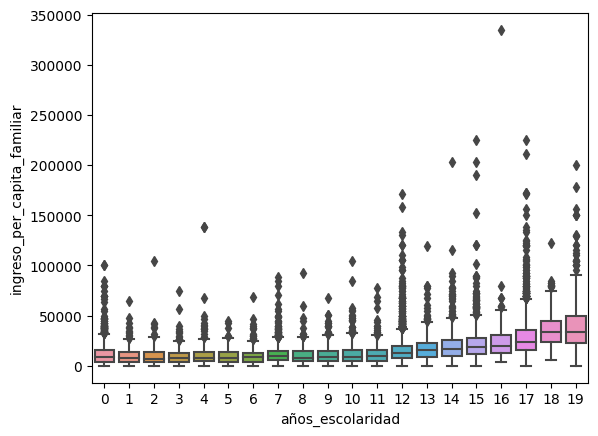

In [35]:
sns.boxplot(x=dataframe['años_escolaridad'], y=dataframe['ingreso_per_capita_familiar'])

In [36]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14497 non-null  int64 
 1   nhogar                       14497 non-null  int64 
 2   miembro                      14497 non-null  int64 
 3   comuna                       14497 non-null  int64 
 4   dominio                      14497 non-null  object
 5   edad                         14497 non-null  int64 
 6   sexo                         14497 non-null  object
 7   parentesco_jefe              14497 non-null  object
 8   situacion_conyugal           14497 non-null  object
 9   num_miembro_padre            14497 non-null  object
 10  num_miembro_madre            14497 non-null  object
 11  estado_ocupacional           14497 non-null  object
 12  cat_ocupacional              14497 non-null  object
 13  calidad_ingresos_lab         14

<Axes: xlabel='dominio', ylabel='id'>

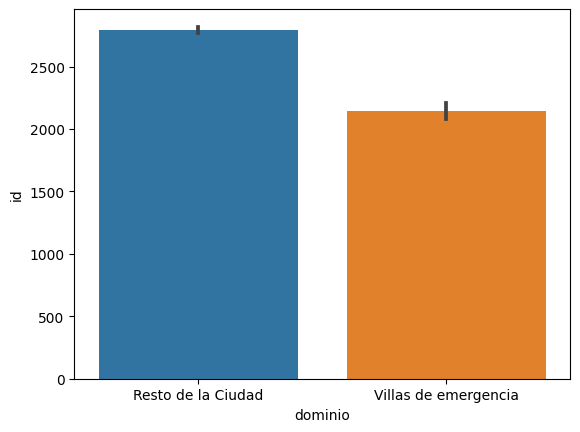

In [37]:
sns.barplot(x=dataframe['dominio'], y=dataframe['id'])

# Codear datos categoricos

si son solo 2 valores hago dummy con pandas

si tiene mas de 2 label encoder con sklearn

In [38]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [39]:
categorical_cols, numerical_cols= num_or_cat(dataframe)
categorical_cols

Index(['dominio', 'sexo', 'parentesco_jefe', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'calidad_ingresos_no_lab',
       'calidad_ingresos_totales', 'calidad_ingresos_familiares',
       'estado_educativo', 'sector_educativo', 'nivel_actual',
       'nivel_max_educativo', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos'],
      dtype='object')

In [40]:
booleanas = []
for col in categorical_cols:
    if len(dataframe[col].unique()) == 2:
        booleanas.append(col)
booleanas

['dominio', 'sexo', 'hijos_nacidos_vivos']

In [ ]:
dataframe['dominio'].unique()

In [ ]:
dominio_dummie = pd.get_dummies(dataframe['dominio']).astype(int)

In [ ]:
dominio_dummie

In [ ]:
dataframe = pd.concat([dataframe, dominio_dummie], axis=1)

In [ ]:
dataframe = dataframe.drop(labels='dominio',axis=1)

In [ ]:
label_encoder = LabelEncoder()

dataframe['CategoryEncoded'] = label_encoder.fit_transform(dataframe['Category'])

In [ ]:
sns.heatmap(dataframe[['ingreso_per_capita_familiar', 'edad','años_escolaridad', 'nhogar', 'miembro','comuna']].corr(), annot=True)